# LOGIN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# NGROK

In [ ]:
!pip install pyngrok
from pyngrok import ngrok

!ngrok authtoken 2nt71aL6t7PcHHEQMgZz0wgQaOU_7rQPSjoRQpe31sPgVmhwn

public_url = ngrok.connect(5001)
print(f"Public URL: {public_url}")

# CODE

Repo card metadata block was not found. Setting CardData to empty.
You are using a model of type clip to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


15970.jpg


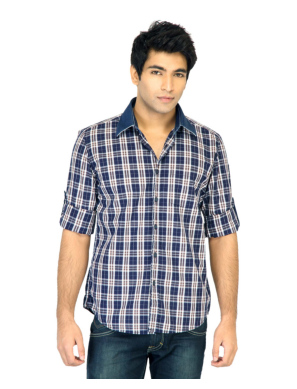

In [ ]:
!pip install datasets
!pip install faiss-gpu
!pip install open_clip_torch
!pip install --upgrade torch
from transformers import AutoModel, AutoProcessor
import torch
from PIL import Image
from io import BytesIO
from datasets import load_dataset
import requests
import matplotlib.pyplot as plt
import faiss
import numpy as np
from flask import Flask, request

app = Flask(__name__)

dataset = load_dataset("ceyda/fashion-products-small", split = 'train')

@app.route('/receive', methods=['POST'])
def receive_message():
  images = dataset['filename']
  images = images

  model = AutoModel.from_pretrained('Marqo/marqo-fashionCLIP', trust_remote_code=True)
  processor = AutoProcessor.from_pretrained('Marqo/marqo-fashionCLIP', trust_remote_code=True)
  data = request.json
  text =  data['text']
  image_features_list = []
  for image in images:
    img = [Image.open(f"/content/drive/MyDrive/Data_one/{image}")]
    processed = processor(text=text, images=img, padding='max_length', return_tensors="pt")

    with torch.no_grad():
        image_features = model.get_image_features(processed['pixel_values'], normalize=True)
        text_features = model.get_text_features(processed['input_ids'], normalize=True)
        normalized_text_features = text_features / text_features.norm(dim=-1, keepdim=True)
        image_features_list.append(image_features)


  image_features_array = np.concatenate(image_features_list)
  index = faiss.IndexFlatL2(image_features_array.shape[1])
  index.add(image_features_array)

  distances, indices = index.search(text_features.numpy(), 1)

  name = images[indices[0][0]]
  similar_image = Image.open(f"/content/drive/MyDrive/Data_one/{name}")
  # тут ретурн нада
